In [1]:
import os

os.environ["BRASA_DATA_PATH"] = "D:\\brasa"

import sys
sys.path.append('..')

import brasa

man = brasa.engine.CacheManager()
con = man.db_connection

In [5]:
con.close()

In [2]:
db_folder_path = man.cache_path(man.db_folder())

In [4]:
con.read_parquet(f"{db_folder_path}/b3-bvbg028-equities/*.parquet").create_view("b3-bvbg028-equities")
con.read_parquet(f"{db_folder_path}/b3-bvbg028-future_contracts/*.parquet").create_view("b3-bvbg028-future_contracts")
con.read_parquet(f"{db_folder_path}/b3-bvbg028-options_on_equities/*.parquet").create_view("b3-bvbg028-options_on_equities")
con.read_parquet(f"{db_folder_path}/b3-bvbg086/*.parquet").create_view("b3-bvbg086")
# con.commit()

┌─────────────────────┬─────────────────────┬────────────────┬───┬──────────────────┬──────────────────────┐
│    creation_date    │       refdate       │     symbol     │ … │ variation_points │ adjusted_value_con…  │
│      timestamp      │      timestamp      │    varchar     │   │      double      │        double        │
├─────────────────────┼─────────────────────┼────────────────┼───┼──────────────────┼──────────────────────┤
│ 2023-06-01 00:00:00 │ 2023-06-01 00:00:00 │ NEOE3F         │ … │             NULL │                 NULL │
│ 2023-06-01 00:00:00 │ 2023-06-01 00:00:00 │ DIFN24V24      │ … │             NULL │                 NULL │
│ 2023-06-01 00:00:00 │ 2023-06-01 00:00:00 │ DOLJ24P005150  │ … │             NULL │                 NULL │
│ 2023-06-01 00:00:00 │ 2023-06-01 00:00:00 │ CCMH24C007400  │ … │             NULL │                 NULL │
│ 2023-06-01 00:00:00 │ 2023-06-01 00:00:00 │ HYPEG395       │ … │             NULL │                 NULL │
│ 2023-06-01 00:00:

In [22]:
os.path.exists(f"{db_folder_path}\\calendar\\calendar.csv")

True

In [23]:
con.read_csv(f"{db_folder_path}\\calendar\\calendar.csv").create_view("calendar")

┌────────────┬─────────────────┬─────────────┐
│  refdate   │ isbizday_ANBIMA │ isbizday_B3 │
│    date    │     boolean     │   boolean   │
├────────────┼─────────────────┼─────────────┤
│ 2016-01-01 │ false           │ false       │
│ 2016-01-02 │ false           │ false       │
│ 2016-01-03 │ false           │ false       │
│ 2016-01-04 │ true            │ true        │
│ 2016-01-05 │ true            │ true        │
│ 2016-01-06 │ true            │ true        │
│ 2016-01-07 │ true            │ true        │
│ 2016-01-08 │ true            │ true        │
│ 2016-01-09 │ false           │ false       │
│ 2016-01-10 │ false           │ false       │
│     ·      │  ·              │  ·          │
│     ·      │  ·              │  ·          │
│     ·      │  ·              │  ·          │
│ 2023-12-20 │ true            │ true        │
│ 2023-12-21 │ true            │ true        │
│ 2023-12-22 │ true            │ true        │
│ 2023-12-23 │ false           │ false       │
│ 2023-12-24 

In [24]:
con.commit()

In [17]:
con.view("b3-bvbg028-future_contracts").columns

['creation_date',
 'refdate',
 'security_id',
 'security_proprietary',
 'instrument_asset',
 'instrument_asset_description',
 'instrument_market',
 'instrument_segment',
 'instrument_description',
 'security_category',
 'maturity_date',
 'symbol',
 'expiration_code',
 'trading_start_date',
 'trading_end_date',
 'value_type_code',
 'isin',
 'cfi_code',
 'delivery_type',
 'payment_type',
 'contract_multiplier',
 'asset_settlement_indicator',
 'allocation_lot_size',
 'trading_currency',
 'underlying_security_id',
 'underlying_security_proprietary',
 'withdrawal_days',
 'working_days',
 'calendar_days',
 'instrument_type']

In [12]:
instr = con.sql("select refdate, symbol, working_days, maturity_date  from 'b3-bvbg028-future_contracts'").filter("refdate = '2023-06-01'").filter("symbol like 'DI1%'").set_alias("instr")
md = con.sql("select refdate, symbol, adjusted_tax, volume, trade_quantity, traded_contracts from 'b3-bvbg086'").filter("traded_contracts > 1000").set_alias("md")
df = instr.join(md, "md.symbol = instr.symbol and md.refdate = instr.refdate", how="inner").order("instr.refdate, instr.working_days").fetchdf()

In [13]:
df

,refdate,symbol,working_days,maturity_date,refdate_2,symbol_2,adjusted_tax,volume,trade_quantity,traded_contracts
0,2023-06-01,DI1N23,21,2023-07-03,2023-06-01,DI1N23,13.642,5.563190e+10,1426.0,562280.0
1,2023-06-01,DI1Q23,42,2023-08-01,2023-06-01,DI1Q23,13.633,1.152682e+09,12.0,11775.0
2,2023-06-01,DI1U23,65,2023-09-01,2023-06-01,DI1U23,13.587,7.835152e+08,31.0,8097.0
3,2023-06-01,DI1V23,85,2023-10-02,2023-06-01,DI1V23,13.525,2.071577e+10,1176.0,216215.0
4,2023-06-01,DI1F24,145,2024-01-02,2023-06-01,DI1F24,13.195,4.996765e+10,9585.0,536918.0
5,2023-06-01,DI1J24,206,2024-04-01,2023-06-01,DI1J24,12.744,4.650060e+09,1652.0,51324.0
6,2023-06-01,DI1M24,249,2024-06-03,2023-06-01,DI1M24,12.409,1.118170e+08,8.0,1256.0
7,2023-06-01,DI1N24,269,2024-07-01,2023-06-01,DI1N24,12.246,1.620761e+10,11358.0,183482.0
8,2023-06-01,DI1V24,335,2024-10-01,2023-06-01,DI1V24,11.798,1.021646e+09,1971.0,11859.0
9,2023-06-01,DI1F25,397,2025-01-02,2023-06-01,DI1F25,11.455,4.193419e+10,35424.0,498355.0


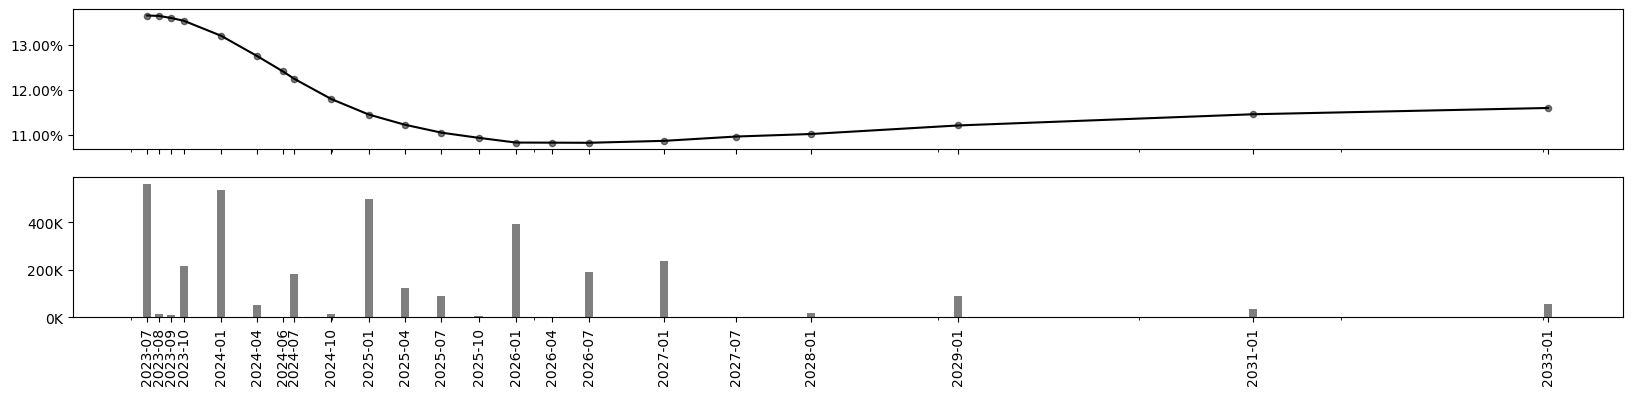

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20, 4))

df.plot(x="maturity_date", y="adjusted_tax", color="black", kind="scatter", alpha=0.5, ax=ax1)
ax1.plot(df["maturity_date"], df["adjusted_tax"], linestyle='-', color='black')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(100))
ax1.set_ylabel("")

ax2.bar(df["maturity_date"], df["traded_contracts"], width=20, color="black", alpha=0.5)
ax2.yaxis.set_major_formatter(lambda x, pos: f'{x / 1000:.0f}K')
ax2.set_xticks(df["maturity_date"])
ax2.set_xticklabels(df["maturity_date"].dt.strftime('%Y-%m'), rotation=90)

plt.show()

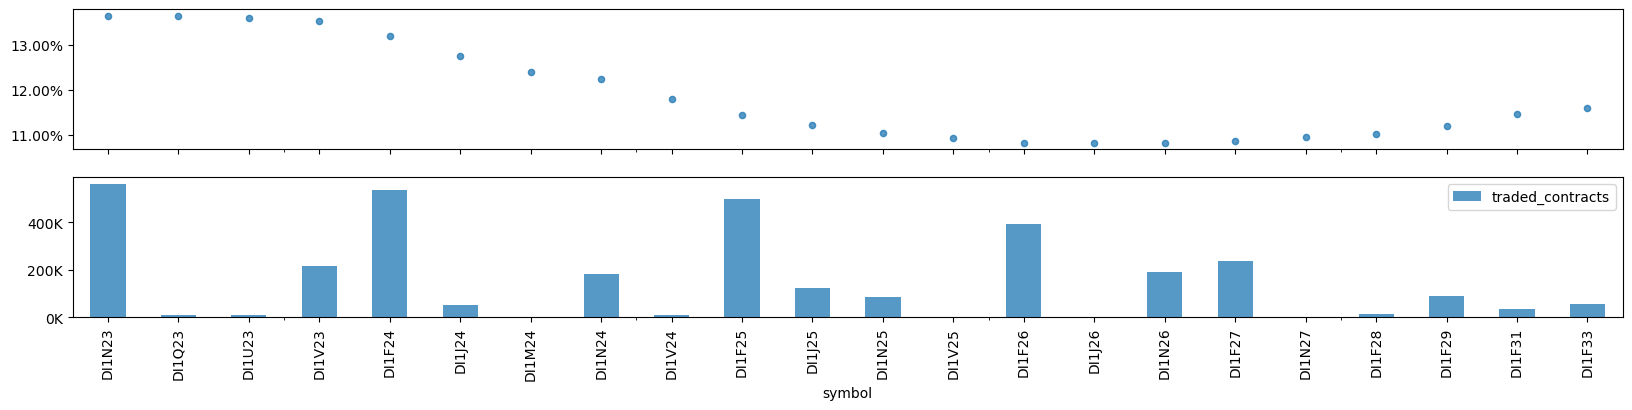

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20, 4))

df.plot(x="symbol", y="adjusted_tax", alpha=0.75, kind="scatter", ax=ax1)
df.plot(x="symbol", y="traded_contracts", alpha=0.75, kind="bar", ax=ax2)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter(100))
ax1.set_ylabel("")
ax2.yaxis.set_major_formatter(lambda x, pos: f'{x / 1000:.0f}K')